## FLIPKART MOBILES DATA ANALYSIS ##

In [22]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import time

# ===============================
# LISTS
# ===============================
productname = []
price = []
rating = []
features = []
pagenum = []
mrp = []
discount = []
ram = []
rom = []
ratings_count = []
reviews_count = []

start_time = time.time()

# ===============================
# SCRAPING
# ===============================
for i in range(1, 50):

    url = f"https://www.flipkart.com/search?q=Laptops&page={i}"

    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        ),
        "Accept-Language": "en-US,en;q=0.9",
    }

    page = requests.get(url, headers=headers, timeout=10)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all("div", class_="ZFwe0M row"):

        pname = x.find("div", class_="RG5Slk")
        cost = x.find("div", class_="hZ3P6w DeU9vF")
        rat = x.find("div", class_="MKiFS6")
        specs = x.find("div", class_="col col-7-12")
        op = x.find("div", class_="kRYCnD gxR4EY")
        review = x.find("span", class_="PvbNMB")
        dis = x.find("div", class_="HQe8jr")

        # ---------------------------
        # BASIC DATA
        # ---------------------------
        productname.append(pname.get_text(strip=True) if pname else np.nan)
        price.append(cost.get_text(strip=True) if cost else np.nan)
        rating.append(rat.get_text(strip=True) if rat else np.nan)
        features.append(specs.get_text(" ", strip=True) if specs else np.nan)
        mrp.append(op.get_text(strip=True) if op else np.nan)
        discount.append(dis.get_text(strip=True) if dis else np.nan)
        pagenum.append(i)

        # ---------------------------
        # RAM
        # ---------------------------
        r1 = re.search(
            r"(?i)\b(\d+)\s*GB\s*(DDR\d)?\s*RAM\b",
            specs.get_text(" ", strip=True) if specs else ""
        )

        ram.append(
            f"{r1.group(1)} GB {r1.group(2)} RAM" if r1 and r1.group(2)
            else f"{r1.group(1)} GB RAM" if r1
            else np.nan
        )

        # ---------------------------
        # ROM
        # ---------------------------
        r2 = re.search(
            r"(?i)\b(\d+)\s*(GB|TB)\s*SSD\b",
            specs.get_text(" ", strip=True) if specs else ""
        )

        rom.append(
            f"{r2.group(1)} {r2.group(2)} SSD" if r2 else np.nan
        )

        # ---------------------------
        # RATINGS & REVIEWS
        # ---------------------------
        r3 = re.search(r"([\d.]+)\s*Ratings", review.text) if review else None
        ratings_count.append(r3.group(1) if r3 else np.nan)

        r4 = re.search(r"([\d,]+)\s*Reviews", review.text) if review else None
        reviews_count.append(r4.group(1).replace(",", "") if r4 else np.nan)

    print(f"Page {i} scraped")

# ===============================
# DATAFRAME
# ===============================
df = pd.DataFrame({
    "productname": productname,
    "price": price,
    "rating": rating,
    "ram": ram,
    "rom": rom,
    "features": features,
    "mrp": mrp,
    "discount": discount,
    "ratings_count": ratings_count,
    "reviews_count": reviews_count,
    "pagenum": pagenum
})

# ===============================
# SAVE TO CSV
# ===============================
df.to_csv("laptop_data.csv", index=False)

print("Total Time Taken:", round(time.time() - start_time, 2), "seconds")
print(df.head())


Page 1 scraped
Page 2 scraped
Page 3 scraped
Page 4 scraped
Page 5 scraped
Page 6 scraped
Page 7 scraped
Page 8 scraped
Page 9 scraped
Page 10 scraped
Page 11 scraped
Page 12 scraped
Page 13 scraped
Page 14 scraped
Page 15 scraped
Page 16 scraped
Page 17 scraped
Page 18 scraped
Page 19 scraped
Page 20 scraped
Page 21 scraped
Page 22 scraped
Page 23 scraped
Page 24 scraped
Page 25 scraped
Page 26 scraped
Page 27 scraped
Page 28 scraped
Page 29 scraped
Page 30 scraped
Page 31 scraped
Page 32 scraped
Page 33 scraped
Page 34 scraped
Page 35 scraped
Page 36 scraped
Page 37 scraped
Page 38 scraped
Page 39 scraped
Page 40 scraped
Page 41 scraped
Page 42 scraped
Page 43 scraped
Page 44 scraped
Page 45 scraped
Page 46 scraped
Page 47 scraped
Page 48 scraped
Page 49 scraped
Total Time Taken: 59.86 seconds
                                         productname    price rating  \
0  Lenovo LOQ Essential Intel Core i7 12650HX - (...  ₹79,990    4.3   
1  HP Pavilion Plus Intel Core i5 13th Gen 1335U 

In [23]:
df

productname      price rating  \
0    Lenovo LOQ Essential Intel Core i7 12650HX - (...    ₹79,990    4.3   
1    HP Pavilion Plus Intel Core i5 13th Gen 1335U ...    ₹64,990    NaN   
2    ASUS Chromebook CX14 Intel Celeron Dual Core N...    ₹14,999      4   
3    ASUS Expertbook P1 Intel Core i3 13th Gen 1315...    ₹39,990    4.3   
4    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...    ₹69,990    4.3   
..                                                 ...        ...    ...   
787  ASUS Vivobook Go 15 (2025) with Office 2024 + ...    ₹39,990    4.3   
788  Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX...  ₹1,39,990    4.4   
789  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...  ₹1,07,990    4.5   
790  HP 15s AMD Ryzen 5 Quad Core 7520U - (8 GB/512...    ₹44,990    4.1   
791  Lenovo LOQ AMD Ryzen 7 Octa Core 7435HS - (24 ...    ₹71,290    4.3   

                ram         rom  \
0    16 GB DDR5 RAM  512 GB SSD   
1    16 GB DDR5 RAM  512 GB SSD   
2               NaN         NaN   
3    16 GB DDR5 RAM  512 GB SSD   
4    16 GB DDR4 RAM  512 GB SSD   
..              ...         ...   
787   8 GB DDR4 RAM  512 GB SSD   
788  16 GB DDR5 RAM    1 TB SSD   
789  16 GB DDR5 RAM  512 GB SSD   
790   8 GB DDR4 RAM  512 GB SSD   
791  24 GB DDR5 RAM  512 GB SSD   

                                              features        mrp discount  \
0    Lenovo LOQ Essential Intel Core i7 12650HX - (...  ₹1,00,990  20% off   
1    HP Pavilion Plus Intel Core i5 13th Gen 1335U ...    ₹92,746  29% off   
2    ASUS Chromebook CX14 Intel Celeron Dual Core N...    ₹23,990  37% off   
3    ASUS Expertbook P1 Intel Core i3 13th Gen 1315...    ₹74,990  46% off   
4    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...    ₹77,507   9% off   
..                                                 ...        ...      ...   
787  ASUS Vivobook Go 15 (2025) with Office 2024 + ...    ₹53,990  25% off   
788  Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX...  ₹1,48,090   5% off   
789  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...  ₹1,12,990   4% off   
790  HP 15s AMD Ryzen 5 Quad Core 7520U - (8 GB/512...    ₹53,413  15% off   
791  Lenovo LOQ AMD Ryzen 7 Octa Core 7435HS - (24 ...    ₹93,190  23% off   

    ratings_count reviews_count  pagenum  
0              89             5        1  
1             NaN           NaN        1  
2              41             3        1  
3             797           401        1  
4             844            54        1  
..            ...           ...      ...  
787           380            33       41  
788           110            10       41  
789           543            41       41  
790           299            17       41  
791           138             8       41  

[792 rows x 11 columns]

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("laptop_data.csv")
df.head()


productname    price  rating  \
0  Lenovo LOQ Essential Intel Core i7 12650HX - (...  ₹79,990     4.3   
1  HP Pavilion Plus Intel Core i5 13th Gen 1335U ...  ₹64,990     NaN   
2  ASUS Chromebook CX14 Intel Celeron Dual Core N...  ₹14,999     4.0   
3  ASUS Expertbook P1 Intel Core i3 13th Gen 1315...  ₹39,990     4.3   
4  HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...  ₹69,990     4.3   

              ram         rom  \
0  16 GB DDR5 RAM  512 GB SSD   
1  16 GB DDR5 RAM  512 GB SSD   
2             NaN         NaN   
3  16 GB DDR5 RAM  512 GB SSD   
4  16 GB DDR4 RAM  512 GB SSD   

                                            features        mrp discount  \
0  Lenovo LOQ Essential Intel Core i7 12650HX - (...  ₹1,00,990  20% off   
1  HP Pavilion Plus Intel Core i5 13th Gen 1335U ...    ₹92,746  29% off   
2  ASUS Chromebook CX14 Intel Celeron Dual Core N...    ₹23,990  37% off   
3  ASUS Expertbook P1 Intel Core i3 13th Gen 1315...    ₹74,990  46% off   
4  HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...    ₹77,507   9% off   

   ratings_count  reviews_count  pagenum  
0           89.0            5.0        1  
1            NaN            NaN        1  
2           41.0            3.0        1  
3          797.0          401.0        1  
4          844.0           54.0        1

In [25]:
# Shape (Rows & Columns)
df.shape


(792, 11)

In [26]:
#Column names
df.columns


Index(['productname', 'price', 'rating', 'ram', 'rom', 'features', 'mrp',
       'discount', 'ratings_count', 'reviews_count', 'pagenum'],
      dtype='object')

In [27]:
df.dtypes

productname       object
price             object
rating           float64
ram               object
rom               object
features          object
mrp               object
discount          object
ratings_count    float64
reviews_count    float64
pagenum            int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productname    792 non-null    object 
 1   price          792 non-null    object 
 2   rating         672 non-null    float64
 3   ram            582 non-null    object 
 4   rom            772 non-null    object 
 5   features       792 non-null    object 
 6   mrp            770 non-null    object 
 7   discount       763 non-null    object 
 8   ratings_count  672 non-null    float64
 9   reviews_count  672 non-null    float64
 10  pagenum        792 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 68.2+ KB


In [29]:
#Missing values
df.isna().sum()


productname        0
price              0
rating           120
ram              210
rom               20
features           0
mrp               22
discount          29
ratings_count    120
reviews_count    120
pagenum            0
dtype: int64

In [30]:
#DATA CLEANING
#Remove Special Characters & Convert Data Types
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df["mrp"] = (
    df["mrp"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df["discount"] = (
    df["discount"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)


df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["reviews_count"] = pd.to_numeric(df["reviews_count"], errors="coerce")
df

productname     price  rating  \
0    Lenovo LOQ Essential Intel Core i7 12650HX - (...   79990.0     4.3   
1    HP Pavilion Plus Intel Core i5 13th Gen 1335U ...   64990.0     NaN   
2    ASUS Chromebook CX14 Intel Celeron Dual Core N...   14999.0     4.0   
3    ASUS Expertbook P1 Intel Core i3 13th Gen 1315...   39990.0     4.3   
4    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...   69990.0     4.3   
..                                                 ...       ...     ...   
787  ASUS Vivobook Go 15 (2025) with Office 2024 + ...   39990.0     4.3   
788  Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX...  139990.0     4.4   
789  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...  107990.0     4.5   
790  HP 15s AMD Ryzen 5 Quad Core 7520U - (8 GB/512...   44990.0     4.1   
791  Lenovo LOQ AMD Ryzen 7 Octa Core 7435HS - (24 ...   71290.0     4.3   

                ram         rom  \
0    16 GB DDR5 RAM  512 GB SSD   
1    16 GB DDR5 RAM  512 GB SSD   
2               NaN         NaN   
3    16 GB DDR5 RAM  512 GB SSD   
4    16 GB DDR4 RAM  512 GB SSD   
..              ...         ...   
787   8 GB DDR4 RAM  512 GB SSD   
788  16 GB DDR5 RAM    1 TB SSD   
789  16 GB DDR5 RAM  512 GB SSD   
790   8 GB DDR4 RAM  512 GB SSD   
791  24 GB DDR5 RAM  512 GB SSD   

                                              features       mrp  discount  \
0    Lenovo LOQ Essential Intel Core i7 12650HX - (...  100990.0      20.0   
1    HP Pavilion Plus Intel Core i5 13th Gen 1335U ...   92746.0      29.0   
2    ASUS Chromebook CX14 Intel Celeron Dual Core N...   23990.0      37.0   
3    ASUS Expertbook P1 Intel Core i3 13th Gen 1315...   74990.0      46.0   
4    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...   77507.0       9.0   
..                                                 ...       ...       ...   
787  ASUS Vivobook Go 15 (2025) with Office 2024 + ...   53990.0      25.0   
788  Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX...  148090.0       5.0   
789  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...  112990.0       4.0   
790  HP 15s AMD Ryzen 5 Quad Core 7520U - (8 GB/512...   53413.0      15.0   
791  Lenovo LOQ AMD Ryzen 7 Octa Core 7435HS - (24 ...   93190.0      23.0   

     ratings_count  reviews_count  pagenum  
0             89.0            5.0        1  
1              NaN            NaN        1  
2             41.0            3.0        1  
3            797.0          401.0        1  
4            844.0           54.0        1  
..             ...            ...      ...  
787          380.0           33.0       41  
788          110.0           10.0       41  
789          543.0           41.0       41  
790          299.0           17.0       41  
791          138.0            8.0       41  

[792 rows x 11 columns]

In [31]:
df.isnull().sum()

productname        0
price              0
rating           120
ram              210
rom               20
features           0
mrp               22
discount          29
ratings_count    120
reviews_count    120
pagenum            0
dtype: int64

In [60]:
df["Brand"] = df["productname"].apply(lambda x:re. findall(r"^\w+",x)[0])

In [61]:
df

productname     price  rating  \
0    Lenovo LOQ Essential Intel Core i7 12650HX - (...   79990.0     4.3   
1    HP Pavilion Plus Intel Core i5 13th Gen 1335U ...   64990.0     NaN   
2    ASUS Chromebook CX14 Intel Celeron Dual Core N...   14999.0     4.0   
3    ASUS Expertbook P1 Intel Core i3 13th Gen 1315...   39990.0     4.3   
4    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...   69990.0     4.3   
..                                                 ...       ...     ...   
787  ASUS Vivobook Go 15 (2025) with Office 2024 + ...   39990.0     4.3   
788  Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX...  139990.0     4.4   
789  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...  107990.0     4.5   
790  HP 15s AMD Ryzen 5 Quad Core 7520U - (8 GB/512...   44990.0     4.1   
791  Lenovo LOQ AMD Ryzen 7 Octa Core 7435HS - (24 ...   71290.0     4.3   

                ram         rom  \
0    16 GB DDR5 RAM  512 GB SSD   
1    16 GB DDR5 RAM  512 GB SSD   
2    16 GB DDR5 RAM  512 GB SSD   
3    16 GB DDR5 RAM  512 GB SSD   
4    16 GB DDR4 RAM  512 GB SSD   
..              ...         ...   
787   8 GB DDR4 RAM  512 GB SSD   
788  16 GB DDR5 RAM    1 TB SSD   
789  16 GB DDR5 RAM  512 GB SSD   
790   8 GB DDR4 RAM  512 GB SSD   
791  24 GB DDR5 RAM  512 GB SSD   

                                              features       mrp  discount  \
0    Lenovo LOQ Essential Intel Core i7 12650HX - (...  100990.0      20.0   
1    HP Pavilion Plus Intel Core i5 13th Gen 1335U ...   92746.0      29.0   
2    ASUS Chromebook CX14 Intel Celeron Dual Core N...   23990.0      37.0   
3    ASUS Expertbook P1 Intel Core i3 13th Gen 1315...   74990.0      46.0   
4    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...   77507.0       9.0   
..                                                 ...       ...       ...   
787  ASUS Vivobook Go 15 (2025) with Office 2024 + ...   53990.0      25.0   
788  Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX...  148090.0       5.0   
789  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...  112990.0       4.0   
790  HP 15s AMD Ryzen 5 Quad Core 7520U - (8 GB/512...   53413.0      15.0   
791  Lenovo LOQ AMD Ryzen 7 Octa Core 7435HS - (24 ...   93190.0      23.0   

     ratings_count  reviews_count  pagenum   Brand  
0             89.0            5.0        1  Lenovo  
1              NaN            NaN        1      HP  
2             41.0            3.0        1    ASUS  
3            797.0          401.0        1    ASUS  
4            844.0           54.0        1      HP  
..             ...            ...      ...     ...  
787          380.0           33.0       41    ASUS  
788          110.0           10.0       41  Lenovo  
789          543.0           41.0       41  Lenovo  
790          299.0           17.0       41      HP  
791          138.0            8.0       41  Lenovo  

[792 rows x 12 columns]

## HANDLE MISSING VALUES ##

In [62]:
df["mrp"].fillna(df["mrp"].mode()[0],inplace=True)
df["discount"].fillna(df["discount"].mode()[0],inplace=True)
df["ram"].fillna(df["ram"].mode()[0],inplace=True)
df["rom"].fillna(df["rom"].mode()[0],inplace=True)

C:\Users\Pravalika.Dadi\AppData\Local\Temp\ipykernel_15708\3168506212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mrp"].fillna(df["mrp"].mode()[0],inplace=True)
C:\Users\Pravalika.Dadi\AppData\Local\Temp\ipykernel_15708\3168506212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [63]:

df.isnull().sum()

productname        0
price              0
rating           120
ram                0
rom                0
features           0
mrp                0
discount           0
ratings_count    120
reviews_count    120
pagenum            0
Brand              0
dtype: int64

## CHECKING DUPLICATES ##

In [64]:
df.duplicated().sum()

np.int64(0)

In [65]:
df=df.drop_duplicates()

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df["productname"].value_counts()

productname
Lenovo LOQ Intel Core i5 13th Gen 13450HX - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeF...    61
Lenovo LOQ 2025 Intel Core i7 13th Gen 13700HX - (16 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVIDIA ...    60
Lenovo LOQ 2025 AMD Ryzen 7 Octa Core 250 - (24 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVIDIA GeFor...    45
Lenovo IdeaPad Pro 5 Intel Core Ultra 9 285H - (32 GB/1 TB SSD/Windows 11 Home) 14IAH10 Thin and Light...    33
Lenovo LOQ Essential Intel Core i7 12650HX - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA Ge...    33
                                                                                                             ..
DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/512 GB SSD/Windows 11 Home) 3530 Thin and Light Laptop          1
Acer Aspire 14 Intel Core i7 13th Gen 13620H - (16 GB/512 GB SSD/Windows 11 Home) AS14H-53 Thin and Li...     1
Lenovo 100e Chromebook Gen 4 MediaTek MediaTek Kompanio 528 - (4 GB/64 GB EMMC Storage/Chrom

In [68]:
df["ram"].value_counts()

ram
16 GB DDR5 RAM    493
8 GB DDR4 RAM     120
16 GB DDR4 RAM     88
24 GB DDR5 RAM     55
32 GB DDR5 RAM     11
8 GB DDR5 RAM      11
24 GB DDR4 RAM      5
4 GB DDR4 RAM       4
8 GB DDR3 RAM       1
12 GB DDR4 RAM      1
12 GB DDR5 RAM      1
4 GB DDR3 RAM       1
32 GB DDR4 RAM      1
Name: count, dtype: int64

In [69]:
df["rom"].value_counts()

rom
512 GB SSD    526
1 TB SSD      231
256 GB SSD     31
2 TB SSD        3
128 GB SSD      1
Name: count, dtype: int64

## EXTRACT CLEANED DATASET ##

In [70]:
df.to_csv("cleaned_laptop_data",index=False)
df=pd.read_csv("cleaned_laptop_data")
df.head()

productname    price  rating  \
0  Lenovo LOQ Essential Intel Core i7 12650HX - (...  79990.0     4.3   
1  HP Pavilion Plus Intel Core i5 13th Gen 1335U ...  64990.0     NaN   
2  ASUS Chromebook CX14 Intel Celeron Dual Core N...  14999.0     4.0   
3  ASUS Expertbook P1 Intel Core i3 13th Gen 1315...  39990.0     4.3   
4  HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...  69990.0     4.3   

              ram         rom  \
0  16 GB DDR5 RAM  512 GB SSD   
1  16 GB DDR5 RAM  512 GB SSD   
2  16 GB DDR5 RAM  512 GB SSD   
3  16 GB DDR5 RAM  512 GB SSD   
4  16 GB DDR4 RAM  512 GB SSD   

                                            features       mrp  discount  \
0  Lenovo LOQ Essential Intel Core i7 12650HX - (...  100990.0      20.0   
1  HP Pavilion Plus Intel Core i5 13th Gen 1335U ...   92746.0      29.0   
2  ASUS Chromebook CX14 Intel Celeron Dual Core N...   23990.0      37.0   
3  ASUS Expertbook P1 Intel Core i3 13th Gen 1315...   74990.0      46.0   
4  HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...   77507.0       9.0   

   ratings_count  reviews_count  pagenum   Brand  
0           89.0            5.0        1  Lenovo  
1            NaN            NaN        1      HP  
2           41.0            3.0        1    ASUS  
3          797.0          401.0        1    ASUS  
4          844.0           54.0        1      HP

In [71]:
# Separate numerical and categorical columns
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)


Continuous Variables: ['price', 'rating', 'mrp', 'discount', 'ratings_count', 'reviews_count', 'pagenum']
Categorical Variables: ['productname', 'ram', 'rom', 'features', 'Brand']


## CALCULATE STATISTICAL VALUES ##

In [72]:
# statistics
summary_stats = pd.DataFrame({
    'Mean': df[continuous_vars].mean(),
    'Median': df[continuous_vars].median(),
    'Mode': [df[col].mode()[0] for col in continuous_vars],
    'Min': df[continuous_vars].min(),
    'Max': df[continuous_vars].max(),
    'Range': df[continuous_vars].max() - df[continuous_vars].min(),
    'Variance': df[continuous_vars].var(),
    'Std Dev': df[continuous_vars].std(),
    'IQR': df[continuous_vars].quantile(0.75) - df[continuous_vars].quantile(0.25)
})
summary_stats.round(2)

Mean   Median      Mode      Min       Max     Range  \
price           81979.52  79145.0  109990.0  10999.0  379990.0  368991.0   
rating              4.27      4.3       4.3      2.0       5.0       3.0   
mrp            101144.27  92746.0   85290.0  16298.0  395990.0  379692.0   
discount           20.77     20.0      20.0      1.0      68.0      67.0   
ratings_count     252.07    110.0      89.0      0.0     986.0     986.0   
reviews_count      74.15     10.0       0.0      0.0    2163.0    2163.0   
pagenum            23.61     25.0       1.0      1.0      41.0      40.0   

                   Variance   Std Dev       IQR  
price          1.734439e+09  41646.60  62000.00  
rating         8.000000e-02      0.29      0.30  
mrp            2.076990e+09  45574.01  65440.00  
discount       1.356900e+02     11.65     17.00  
ratings_count  6.932526e+04    263.30    406.00  
reviews_count  4.037168e+04    200.93     43.75  
pagenum        1.309500e+02     11.44     18.00

## CREATING INSIGHTS VISUALLY ##

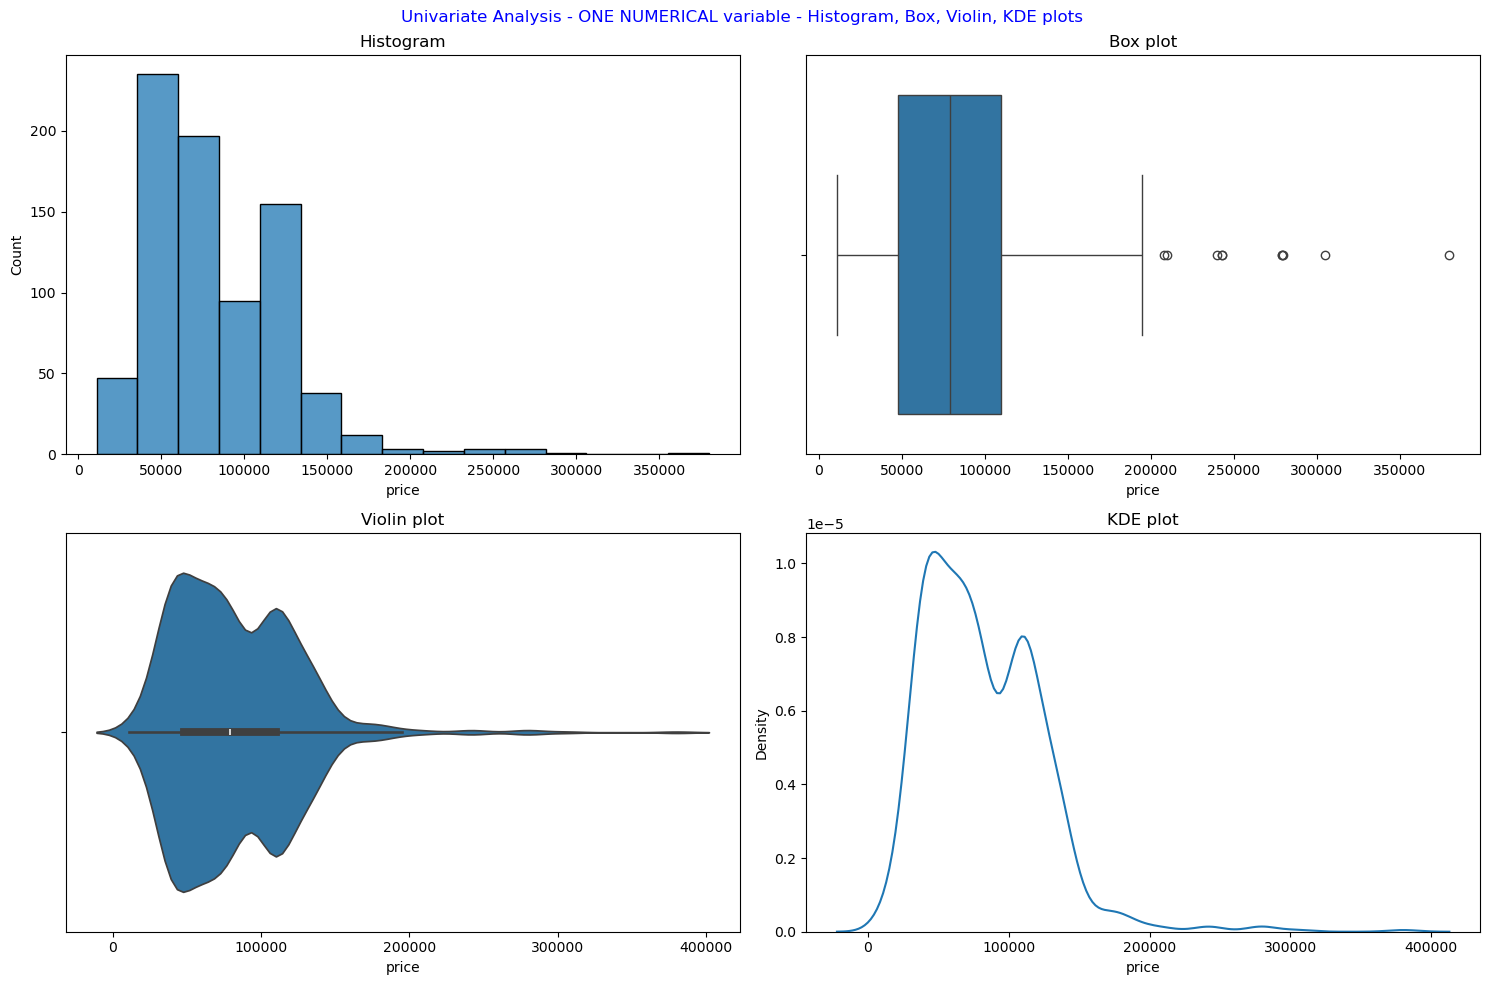

In [73]:
# PLots with ONE NUMERICAL variable - Histogram, Box, Violin, KDE plots 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
plt.suptitle("Univariate Analysis - ONE NUMERICAL variable - Histogram, Box, Violin, KDE plots ", color = "b")

sns.histplot(data=df, x ="price", bins = 15, ax = axs[0,0])
axs[0,0].set_title("Histogram")

sns.boxplot(data=df, x ="price", ax = axs[0,1])
axs[0,1].set_title("Box plot")

sns.violinplot(data=df, x ="price", ax = axs[1,0])
axs[1,0].set_title("Violin plot")

sns.kdeplot(data=df, x ="price", ax = axs[1,1])
axs[1,1].set_title("KDE plot")

plt.tight_layout() 
plt.show();

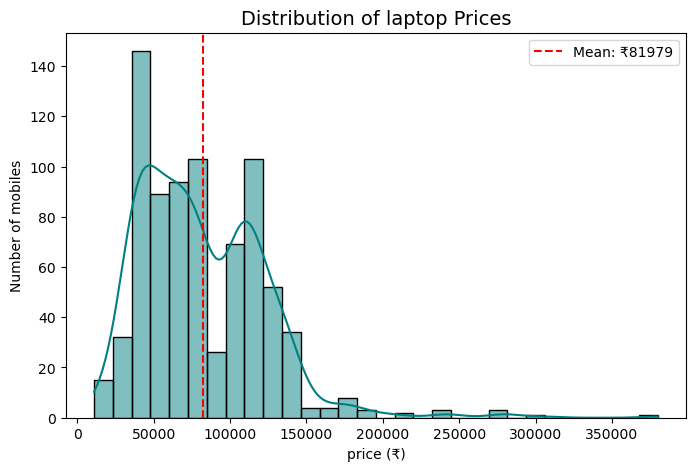

Mean price: ₹ 81979.52
Median price: ₹ 79145.0
Mode price: ₹ 109990.0


In [74]:
# Histogram of mobile Prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins=30, color='teal')
plt.title("Distribution of laptop Prices", fontsize=14)
plt.xlabel("price (₹)")
plt.ylabel("Number of mobiles")
plt.axvline(df['price'].mean(), color='red', linestyle='--', label=f"Mean: ₹{int(df['price'].mean())}")
plt.legend()
plt.show()

# Central tendency
print("Mean price: ₹", round(df['price'].mean(), 2))
print("Median price: ₹", round(df['price'].median(), 2))
print("Mode price: ₹", df['price'].mode()[0])


PRICE DISTRIBUTION :
Observation:
 Majority of mobile phones are priced between ₹5000 to ₹30000,showing high 
concentration in the bugdet and mid-range segment.
Interpretation:
Consumers mainly prefer affordable and mid-range mobiles, driving higher volume sales in this segment.
Median price is more representative than mean, as premium phones inflate the average price.

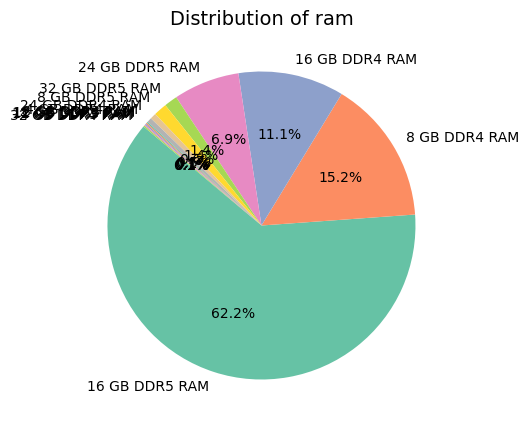

Ram Frequency:
 ram
16 GB DDR5 RAM    493
8 GB DDR4 RAM     120
16 GB DDR4 RAM     88
24 GB DDR5 RAM     55
32 GB DDR5 RAM     11
8 GB DDR5 RAM      11
24 GB DDR4 RAM      5
4 GB DDR4 RAM       4
8 GB DDR3 RAM       1
12 GB DDR4 RAM      1
12 GB DDR5 RAM      1
4 GB DDR3 RAM       1
32 GB DDR4 RAM      1
Name: count, dtype: int64


In [75]:
# Pie Chart of Ram
plt.figure(figsize=(7,5))
df['ram'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of ram", fontsize=14)
plt.ylabel("")
plt.show()

# Count of each category
print("Ram Frequency:\n", df['ram'].value_counts())
#  Observation:
# 8 GB RAM dominates the market with ~48%, followed by 4 GB (20.7%) and 12 GB (14.8%).
# 6 GB and 16 GB RAM models have very low share, indicating limited availability or demand.
#  Interpretation:
# Consumers prefer balanced performance at mid-range pricing, making 8 GB RAM the most popular choice.
# Higher RAM variants like 16 GB target niche users, while lower RAM options are gradually declining.


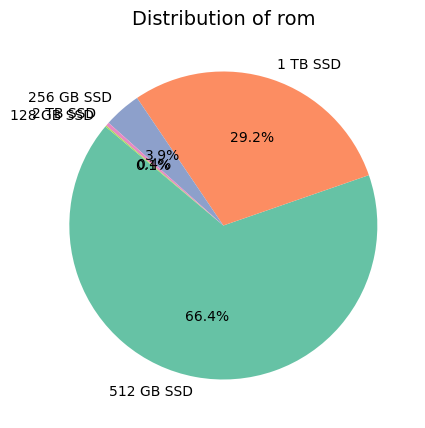

Rom Frequency:
 rom
512 GB SSD    526
1 TB SSD      231
256 GB SSD     31
2 TB SSD        3
128 GB SSD      1
Name: count, dtype: int64


In [76]:
# Pie Chart of Rom
plt.figure(figsize=(7,5))
df['rom'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of rom", fontsize=14)
plt.ylabel("")
plt.show()

# Count of each category
print("Rom Frequency:\n", df['rom'].value_counts())
#  Observations
# 128 GB ROM dominates the distribution with ~64.9%, followed by 256 GB ROM (22%).
# Lower storage variants (64 GB and below) contribute a very small share of the total.
#  Interpretation
# Consumers clearly prefer higher storage capacity to support apps, media, and long-term usage.
# 128 GB has become the standard storage option, while lower ROM variants are losing relevance.

## BI-VARIATE ANALYSIS ##

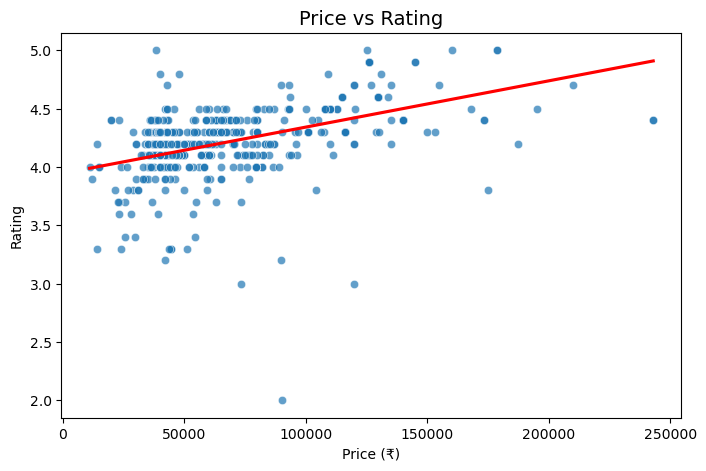

Correlation between Price and Rating: 0.51


In [77]:
# Scatter Plot of Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='rating', data=df, alpha=0.7)
sns.regplot(x='price', y='rating', data=df, scatter=False, color='red', ci=None)
plt.title("Price vs Rating", fontsize=14)
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()

# Correlation coefficient
corr_value = df['price'].corr(df['rating'])
print(f"Correlation between Price and Rating: {corr_value:.2f}")
#  Observations
# The scatter plot shows a slight positive trend between price and rating, indicated by the upward regression line.
# Most mobiles, regardless of price, have ratings clustered between 3.5 and 4.5.
#  Interpretation
# Higher price does not guarantee significantly higher ratings; customer satisfaction is fairly consistent across price ranges.
# Factors like features, brand value, and user experience influence ratings more than price alone.

## MULTI-VARIATE ANALYSIS ##

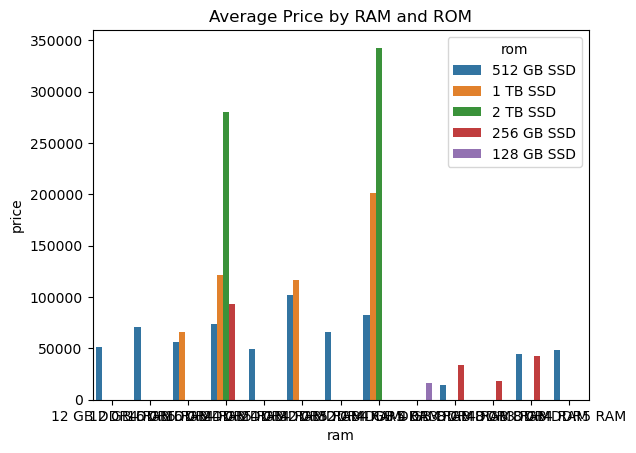

In [78]:
top10 = (df.groupby(['ram','rom'])['price'] .mean() .reset_index())
sns.barplot(x='ram', y='price', hue='rom', data=top10)
plt.title("Average Price by RAM and ROM")
plt.show()
# Observations
# Average price increases with higher RAM, and within the same RAM, higher ROM variants are priced higher.
# High RAM + high ROM combinations (e.g., 8–12 GB RAM with 256 GB/512 GB ROM) show the highest average prices.
#  Interpretation
# Mobile pricing is strongly influenced by a combination of RAM and ROM, not by a single specification alone.
# Manufacturers position higher RAM–ROM configurations as premium offerings, targeting performance-oriented users.

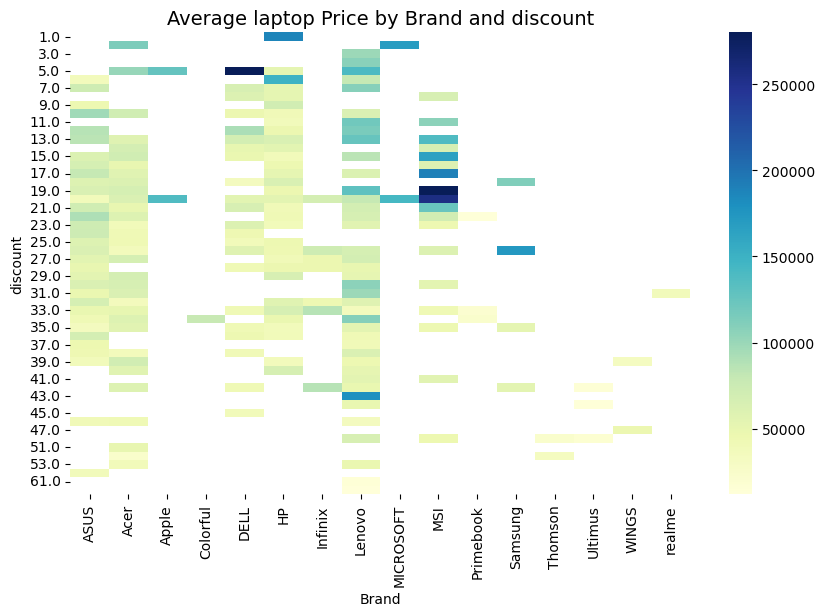

In [79]:
# Create a pivot table of average Price per Brand per Year
pivot_table = df.pivot_table(
    values='price', 
    index='discount', 
    columns='Brand', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, fmt=".0f", cmap='YlGnBu')
plt.title("Average laptop Price by Brand and discount", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("discount")
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productname    792 non-null    object 
 1   price          792 non-null    float64
 2   rating         672 non-null    float64
 3   ram            792 non-null    object 
 4   rom            792 non-null    object 
 5   features       792 non-null    object 
 6   mrp            792 non-null    float64
 7   discount       792 non-null    float64
 8   ratings_count  672 non-null    float64
 9   reviews_count  672 non-null    float64
 10  pagenum        792 non-null    int64  
 11  Brand          792 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 74.4+ KB


In [81]:
df.select_dtypes(include=['number']).columns

Index(['price', 'rating', 'mrp', 'discount', 'ratings_count', 'reviews_count',
       'pagenum'],
      dtype='object')

In [82]:
numeric_cols = ['rating','discount','mrp']

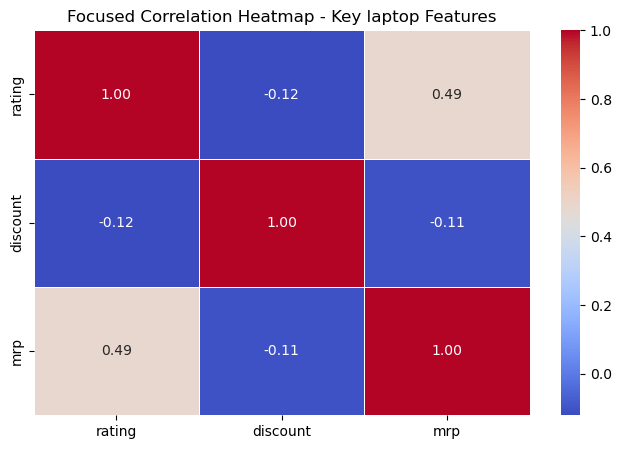

In [83]:
# Filter the dataset
corr_df = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Focused Correlation Heatmap - Key laptop Features")
plt.show()
#  Observations
# Rating and MRP have a moderate positive correlation (0.39), indicating slightly higher ratings for higher-MRP mobiles.
# Discount shows almost no correlation with rating (-0.01) and a very weak negative correlation with MRP (-0.07).
#  Interpretation
# Higher-priced or premium phones tend to receive marginally better ratings, but price is not the dominant factor for customer satisfaction.
# Discounts do not significantly influence ratings, suggesting that user experience matters more than price reductions.

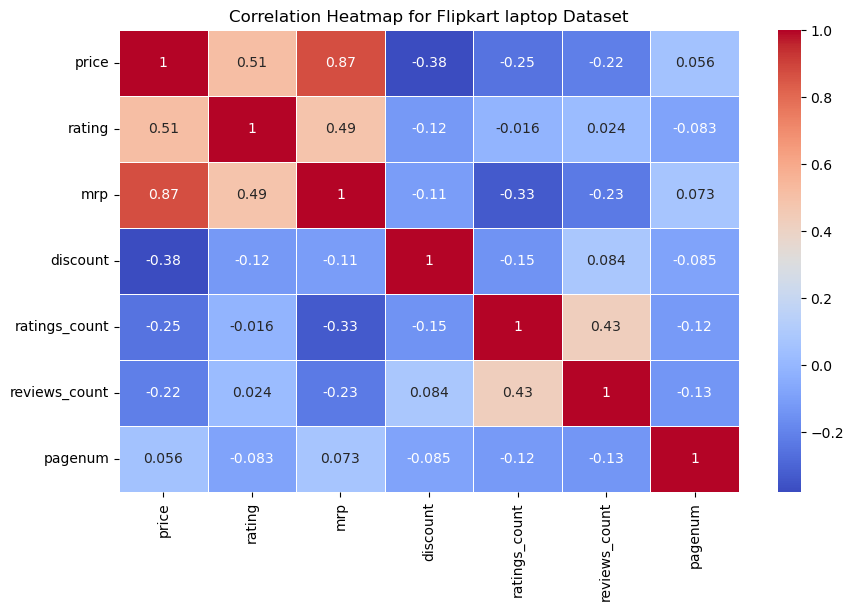

In [84]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Flipkart laptop Dataset")
plt.show()
# Observations
# Price has a moderate positive correlation with rating (0.45) and MRP (0.40), while most other variables show weak or negligible relationships.
# Ratings_count and reviews_count have weak correlations with price and rating, indicating limited linear influence.
#  Interpretation
# Higher-priced and higher-MRP mobiles tend to receive slightly better ratings, but pricing alone does not strongly drive user engagement.
# User activity (ratings & reviews count) is influenced by factors beyond price and discounts, such as brand trust and product experience.

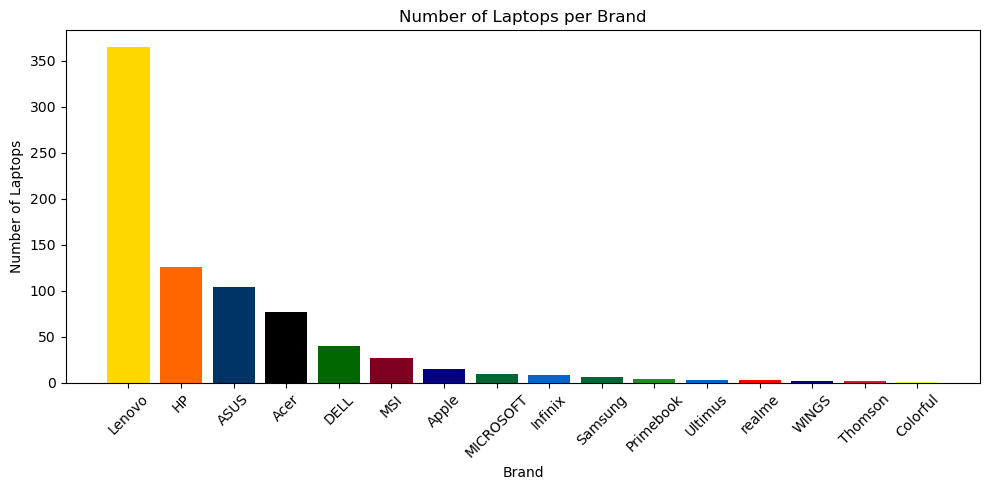

In [86]:
#Brand Count

brandcounts = df['Brand'].value_counts()
colours = ['#FFD700','#FF6600','#003366','#000000','#006600','#800020','#000080',
           '#006633','#0066CC','#006633','#228B22','#0066CC','#FF0000','#000080',
           '#DC143C','#FFFF33','#FF00FF']
plt.figure(figsize=(10,5))
plt.bar(brandcounts.index, brandcounts.values, color=colours[:len(brandcounts)])
plt.title("Number of Laptops per Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
pd.crosstab(df["Brand"], df["ram"])


ram        12 GB DDR4 RAM  12 GB DDR5 RAM  16 GB DDR4 RAM  16 GB DDR5 RAM  \
Brand                                                                       
ASUS                    0               0              23              54   
Acer                    0               0              22              33   
Apple                   0               0               0              13   
Colorful                0               0               0               1   
DELL                    0               0               9              12   
HP                      1               0              19              57   
Infinix                 0               0               0               7   
Lenovo                  0               1               5             285   
MICROSOFT               0               0               0               9   
MSI                     0               0               9              10   
Primebook               0               0               0               4   
Samsung                 0               0               0               6   
Thomson                 0               0               0               2   
Ultimus                 0               0               0               0   
WINGS                   0               0               1               0   
realme                  0               0               0               0   

ram        24 GB DDR4 RAM  24 GB DDR5 RAM  32 GB DDR4 RAM  32 GB DDR5 RAM  \
Brand                                                                       
ASUS                    0               0               0               3   
Acer                    1               0               0               2   
Apple                   0               0               0               0   
Colorful                0               0               0               0   
DELL                    0               0               0               2   
HP                      2               2               1               1   
Infinix                 0               0               0               0   
Lenovo                  2              53               0               0   
MICROSOFT               0               0               0               0   
MSI                     0               0               0               3   
Primebook               0               0               0               0   
Samsung                 0               0               0               0   
Thomson                 0               0               0               0   
Ultimus                 0               0               0               0   
WINGS                   0               0               0               0   
realme                  0               0               0               0   

ram        4 GB DDR3 RAM  4 GB DDR4 RAM  8 GB DDR3 RAM  8 GB DDR4 RAM  \
Brand                                                                   
ASUS                   0              2              0             21   
Acer                   0              0              0             19   
Apple                  0              0              0              2   
Colorful               0              0              0              0   
DELL                   0              1              0              8   
HP                     0              0              0             41   
Infinix                0              0              0              1   
Lenovo                 0              0              0             19   
MICROSOFT              0              0              0              0   
MSI                    0              0              0              5   
Primebook              0              0              0              0   
Samsung                0              0              0              0   
Thomson                0              0              0              0   
Ultimus                1              1              1              0   
WINGS                  0              0              0    

In [88]:
pd.pivot_table(df, values="price", index="Brand", columns="ram", aggfunc="mean")


ram        12 GB DDR4 RAM  12 GB DDR5 RAM  16 GB DDR4 RAM  16 GB DDR5 RAM  \
Brand                                                                       
ASUS                  NaN             NaN    64205.478261    61143.148148   
Acer                  NaN             NaN    51113.000000    71796.787879   
Apple                 NaN             NaN             NaN   144283.769231   
Colorful              NaN             NaN             NaN    78099.000000   
DELL                  NaN             NaN    56130.333333    60894.666667   
HP                50990.0             NaN    55302.842105    61752.982456   
Infinix               NaN             NaN             NaN    67036.714286   
Lenovo                NaN         70990.0    53541.800000   101278.733333   
MICROSOFT             NaN             NaN             NaN   155101.111111   
MSI                   NaN             NaN    56925.444444   135341.900000   
Primebook             NaN             NaN             NaN    19240.000000   
Samsung               NaN             NaN             NaN   113016.333333   
Thomson               NaN             NaN             NaN    28290.000000   
Ultimus               NaN             NaN             NaN             NaN   
WINGS                 NaN             NaN    46990.000000             NaN   
realme                NaN             NaN             NaN             NaN   

ram        24 GB DDR4 RAM  24 GB DDR5 RAM  32 GB DDR4 RAM  32 GB DDR5 RAM  \
Brand                                                                       
ASUS                  NaN             NaN             NaN        155741.0   
Acer              41490.0             NaN             NaN        243000.0   
Apple                 NaN             NaN             NaN             NaN   
Colorful              NaN             NaN             NaN             NaN   
DELL                  NaN             NaN             NaN        278990.0   
HP                48994.5   124990.000000         65990.0        127680.0   
Infinix               NaN             NaN             NaN             NaN   
Lenovo            52490.0   114835.622642             NaN             NaN   
MICROSOFT             NaN             NaN             NaN             NaN   
MSI                   NaN             NaN             NaN        245990.0   
Primebook             NaN             NaN             NaN             NaN   
Samsung               NaN             NaN             NaN             NaN   
Thomson               NaN             NaN             NaN             NaN   
Ultimus               NaN             NaN             NaN             NaN   
WINGS                 NaN             NaN             NaN             NaN   
realme                NaN             NaN             NaN             NaN   

ram        4 GB DDR3 RAM  4 GB DDR4 RAM  8 GB DDR3 RAM  8 GB DDR4 RAM  \
Brand                                                                   
ASUS                 NaN        35630.0            NaN   45470.380952   
Acer                 NaN            NaN            NaN   41428.315789   
Apple                NaN            NaN            NaN   91400.000000   
Colorful             NaN            NaN            NaN            NaN   
DELL                 NaN        29990.0            NaN   47338.250000   
HP                   NaN            NaN            NaN   42139.951220   
Infinix              NaN            NaN            NaN   49990.000000   
Lenovo               NaN            NaN            NaN   45345.578947   
MICROSOFT            NaN            NaN            NaN            NaN   
MSI                  NaN            NaN            NaN   51113.600000   
Primebook            NaN            NaN            NaN            NaN   
Samsung              NaN            NaN            NaN            NaN   
Thomson              NaN            NaN            NaN            NaN   
Ultimus          15990.0        13990.0        18490.0            NaN   
WINGS                NaN            NaN            NaN   3

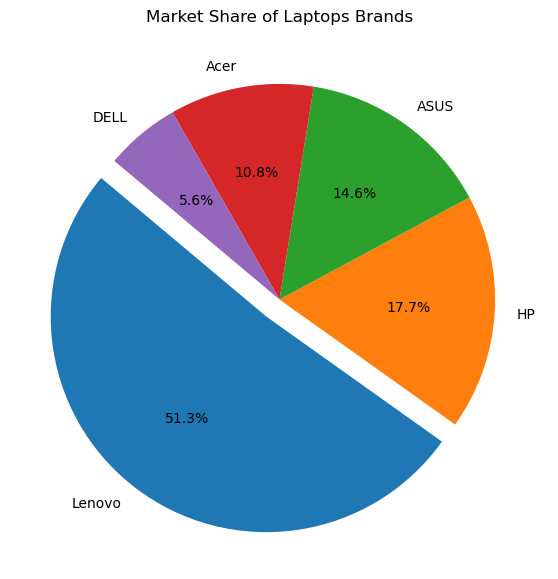

In [89]:
brand_count = df['Brand'].value_counts().head(5)
plt.figure(figsize=(7,7))
plt.pie(brand_count, labels=brand_count.index, autopct='%1.1f%%', startangle=140, explode=(0.1,0,0,0,0))
plt.title("Market Share of Laptops Brands")
plt.show()